# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
bCancer <- read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
bCancer <- bCancer[rep(row.names(bCancer), bCancer$count), 1:ncol(bCancer)-1]
print(paste("El data frame tiene ",nrow(bCancer),"filas."))

[1] "El data frame tiene  6318638 filas."


In [3]:
head(bCancer)
tail(bCancer)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
1,2000,1,1,0,0,0,1,0,1,3,0,0
2,2000,1,1,0,0,1,3,0,1,2,0,0
3,2000,1,1,0,0,1,4,0,1,1,0,0
3.1,2000,1,1,0,0,1,4,0,1,1,0,0
4,2000,1,1,0,0,2,3,0,1,1,0,0
5,2000,1,1,0,0,2,3,0,1,1,1,9


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
1144563.4,2009,13,9,9,9,9,9,9,2,9,9,0
1144563.5,2009,13,9,9,9,9,9,9,2,9,9,0
1144563.6,2009,13,9,9,9,9,9,9,2,9,9,0
1144564,2009,13,9,9,9,9,9,9,2,9,9,9
1144564.1,2009,13,9,9,9,9,9,9,2,9,9,9
1144564.2,2009,13,9,9,9,9,9,9,2,9,9,9


El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [4]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
n <- 5000
indices <- sample(1:nrow(bCancer),n,replace=F)
bCancer <- bCancer[indices,]
print("done")

[1] "done"


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [5]:
factorColumns <- c("year","age_group_5_years","race_eth", "first_degree_hx", "age_menarche", "age_first_birth", 
                  "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")
bCancer[factorColumns] <- lapply(bCancer[factorColumns], factor)
for (column in factorColumns){
    if (column != "age_group_5_years"){
    levels(bCancer[,paste(column)])[levels(bCancer[,paste(column)])=="9"] <- NA
    }
    print(paste(c("Column", column, "has", sum(is.na(as.character(bCancer[,paste(column)]))), "NAs.",
                  "Unique values are:",sort(as.character(unique(bCancer[,paste(column)])))),collapse=" "))
}
str(bCancer)
levels(bCancer$first_degree_hx)[levels(bCancer$first_degree_hx) == " "] <- NA


[1] "Column year has 0 NAs. Unique values are: 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009"
[1] "Column age_group_5_years has 0 NAs. Unique values are: 1 10 11 12 13 2 3 4 5 6 7 8 9"
[1] "Column race_eth has 609 NAs. Unique values are: 1 2 3 4 5 6"
[1] "Column first_degree_hx has 489 NAs. Unique values are: 0 1"
[1] "Column age_menarche has 3311 NAs. Unique values are: 0 1 2"
[1] "Column age_first_birth has 2790 NAs. Unique values are: 0 1 2 3 4"
[1] "Column BIRADS_breast_density has 1331 NAs. Unique values are: 1 2 3 4"
[1] "Column current_hrt has 961 NAs. Unique values are: 0 1"
[1] "Column menopaus has 765 NAs. Unique values are: 1 2 3"
[1] "Column bmi_group has 2641 NAs. Unique values are: 1 2 3 4"
[1] "Column biophx has 480 NAs. Unique values are: 0 1"
[1] "Column breast_cancer_history has 1020 NAs. Unique values are: 0 1"
'data.frame':	5000 obs. of  12 variables:
 $ year                 : Factor w/ 10 levels "2000","2001",..: 7 9 8 9 5 2 3 5 7 10 ...
 $ age_group_5_years   

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [6]:
ages<-c(24,32,37,42,47,52,57,62,67,72,77,82,85)
bCancer$estimatedAge <- bCancer$age_group_5_years
levels(bCancer$estimatedAge)
levels(bCancer$estimatedAge)=ages
levels(bCancer$estimatedAge)
bCancer$estimatedAge<-as.numeric(as.character(bCancer$estimatedAge))


[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13"

[1] "24" "32" "37" "42" "47" "52" "57" "62" "67" "72" "77" "82" "85"

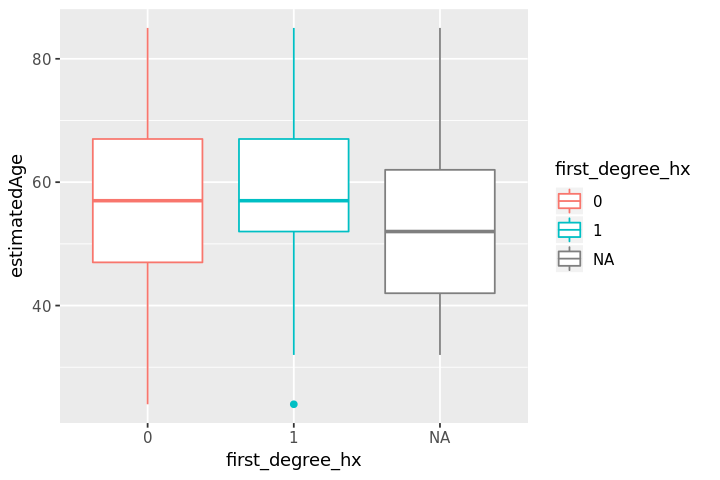

In [7]:
options(repr.plot.height=4,repr.plot.width=6)
library(ggplot2)
ggplot(bCancer,aes(y=estimatedAge,x=first_degree_hx,color=first_degree_hx))+geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [18]:
#analizamos si los grupos siguen una distribución normal
for (v in levels(bCancer$first_degree_hx)){
    print(paste("first_degree_hx:",v,"pvalue:",shapiro.test(bCancer$estimatedAge[bCancer$first_degree_hx==v])$p.value))
}
print(paste("Se rechaza Ho: La edad estimada sigue una distribución normal para cada grupo"))

#Si la distribución no es normal se usa el test Wilcoxon-Mann-Whitney 
wc<-wilcox.test(estimatedAge ~ first_degree_hx, data=bCancer)
#str(wc)
#t.test(bCancer$estimatedAge[bCancer$first_degree_hx=="1"],bCancer$estimatedAge[bCancer$first_degree_hx=="0"])
print(paste("Hay que usar el test Wilcoxon-Mann-Whitney para poblaciones que no siguen una distribución normal.",
"Se rechaza H0 con un pvalor:",wc$p.value,". Las distribuiciones son diferentes y por lo tanto las medias son diferentes."))
print(paste("En conclusión existe diferencia estadísticamente significativa entre la edad de aparición del cáncer ",
      "en función de si hay antecedentes familiares"))
wc

[1] "first_degree_hx: 0 pvalue: 2.81514660265516e-31"
[1] "first_degree_hx: 1 pvalue: 2.51736953215571e-11"
[1] "Se rechaza Ho: La edad estimada sigue una distribución normal para cada grupo"
[1] "Hay que usar el test Wilcoxon-Mann-Whitney para poblaciones que no siguen una distribución normal. Se rechaza H0 con un pvalor: 2.33852483042442e-06 . Las distribuiciones son diferentes y por lo tanto las medias son diferentes."
[1] "En conclusión existe diferencia estadísticamente significativa entre la edad de aparición del cáncer  en función de si hay antecedentes familiares"



	Wilcoxon rank sum test with continuity correction

data:  estimatedAge by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

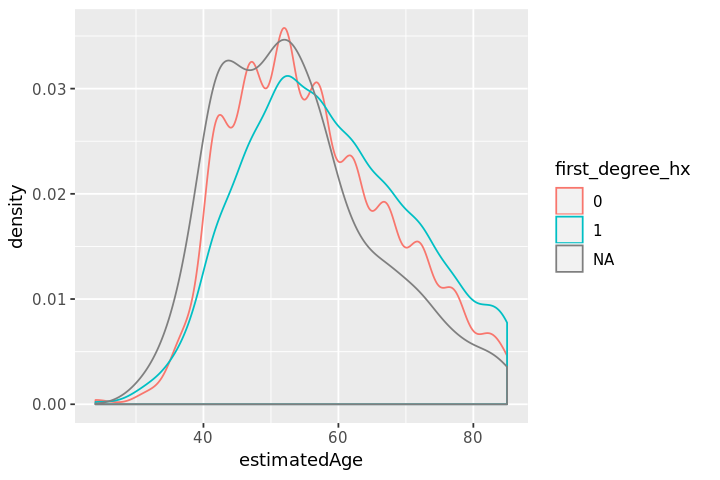

In [9]:
ggplot(data=bCancer, aes(x=estimatedAge,color=first_degree_hx))+geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

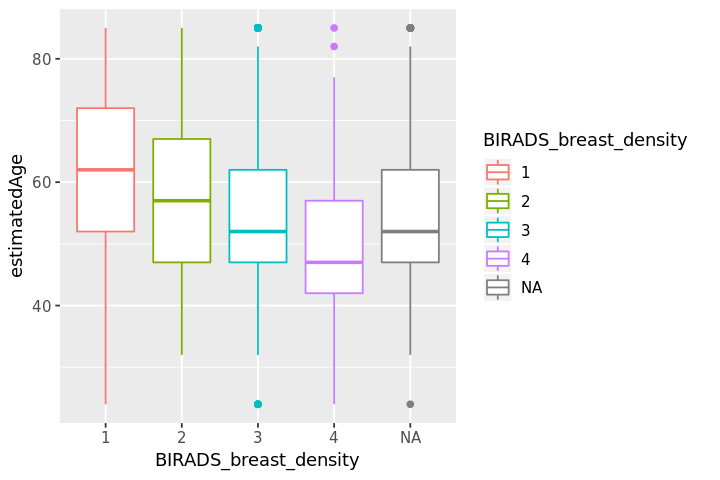

In [10]:
ggplot(bCancer,aes(y=estimatedAge,x=BIRADS_breast_density,color=BIRADS_breast_density))+geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [27]:
#test de normalidad
for (v in levels(bCancer$BIRADS_breast_density)){
    print(paste("BIRADS_breast_density:",v,"pvalue:",
                shapiro.test(bCancer$estimatedAge[bCancer$BIRADS_breast_density==v])$p.value))
}
cat("Se rechaza H0: los grupos siguen una distribución normal.\n")
cat("Hay que usar el test de Kruskal-Wallis para comprobar si las medias de los grupos son iguales.",
    " Se usa cuando los grupos no siguen una normal.")
#Test de Kruskal-Wallis para identificar si los grupos tienen la misma dist. 
kt<-kruskal.test( estimatedAge ~ BIRADS_breast_density, data=bCancer)
cat("\nSe rechaza H0: las medias son iguales con pvalor", kt$p.value,". Por lo tanto,",
    "la edad en la que se detecta el cáncer depende de la densidad del cáncer.")
cat("\nThe default option with NAs is:",getOption("na.action"))

[1] "BIRADS_breast_density: 1 pvalue: 7.96258603243596e-05"
[1] "BIRADS_breast_density: 2 pvalue: 2.01983358371917e-20"
[1] "BIRADS_breast_density: 3 pvalue: 1.3039137421842e-20"
[1] "BIRADS_breast_density: 4 pvalue: 3.33994059507337e-09"
Se rechaza H0: los grupos siguen una distribución normal.
Hay que usar el test de Kruskal-Wallis para comprobar si las medias de los grupos son iguales.  Se usa cuando los grupos no siguen una normal.
Se rechaza H0: las medias son iguales con pvalor 1.218342e-33 . Por lo tanto, la edad en la que se detecta el cáncer depende de la densidad del cáncer.
The default option with NAs is: na.omit

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [28]:
#Test de Tukey para encontrar las medias que son significativamente diferentes de cada uno de los grupos. 
TukeyHSD(aov( estimatedAge ~ BIRADS_breast_density, data=bCancer))
cat("Los grupos 1 y 2 tienen alta probabilidad de tener la misma media.",
    " Los demás grupos tienen media diferente entre si.")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = estimatedAge ~ BIRADS_breast_density, data = bCancer)

$BIRADS_breast_density
         diff        lwr        upr     p adj
2-1 -1.660806  -3.590326  0.2687136 0.1200455
3-1 -5.068672  -7.019612 -3.1177321 0.0000000
4-1 -9.468447 -12.080906 -6.8559886 0.0000000
3-2 -3.407866  -4.507993 -2.3077383 0.0000000
4-2 -7.807641  -9.864108 -5.7511745 0.0000000
4-3 -4.399775  -6.476353 -2.3231978 0.0000003


Los grupos 1 y 2 tienen alta probabilidad de tener la misma media.  Los demás grupos tienen media diferente entre si.

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [13]:
totalCases<-nrow(bCancer[is.na(bCancer$BIRADS_breast_density)==FALSE,])
table(bCancer[is.na(bCancer$BIRADS_breast_density)==FALSE,]$BIRADS_breast_density)/totalCases
print(paste("El tipo de cáncer más común es 2: Scattered fibroglandular con una proporción del 45.38%."))


         1          2          3          4 
0.08094849 0.45380213 0.39547561 0.06977378 

[1] "El tipo de cáncer más común es 2: Scattered fibroglandular con una proporción del 45.38%."


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [14]:
M <- table(na.omit(data.frame(BIRADS_breast_density=as.numeric(as.character(bCancer$BIRADS_breast_density)),
                        first_degree_hx=as.numeric(as.character(bCancer$first_degree_hx)))))
M
chisq.test(M)
fisher.test(M)
cat("No se rechaza H0 con un pvalor de de Fisher de 0.2273, por lo tanto el tipo de cáncer (BIRADS) no depende de si",
    "han habido antecedentes familiares.")

                     first_degree_hx
BIRADS_breast_density    0    1
                    1  223   56
                    2 1324  248
                    3 1135  229
                    4  190   45


	Pearson's Chi-squared test

data:  M
X-squared = 4.2475, df = 3, p-value = 0.236



	Fisher's Exact Test for Count Data

data:  M
p-value = 0.2273
alternative hypothesis: two.sided


No se rechaza H0 con un pvalor de de Fisher de 0.2273, por lo tanto el tipo de cáncer (BIRADS) no depende de si han habido antecedentes familiares.

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [15]:
M <- table(na.omit(data.frame(BIRADS_breast_density=as.numeric(as.character(bCancer$BIRADS_breast_density)),
                        race_eth=as.numeric(as.character(bCancer$race_eth)))))
M
chisq.test(M)
fisher.test(M, simulate.p.value = TRUE,B = 1e6) #simulate pvalue para matrices de dimensión diferente de 2x2
cat("Se rechaza H0 con un pvalor de 1.971e-05 en el test Chi cuadrado (alternativamente 5.8e-05 en el test de Fisher),",
    " por lo tanto el tipo de cáncer (BIRADS) depende del grupo étnico.")

                     race_eth
BIRADS_breast_density    1    2    3    4    5    6
                    1  204   23   11    1   26    2
                    2 1208  100   51    7   98   19
                    3 1021   92   85    6   94   15
                    4  179   11   29    3   11    3

Warning message in chisq.test(M):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  M
X-squared = 48.684, df = 15, p-value = 1.971e-05



	Fisher's Exact Test for Count Data with simulated p-value (based on
	1e+06 replicates)

data:  M
p-value = 6.6e-05
alternative hypothesis: two.sided


Se rechaza H0 con un pvalor de 1.971e-05 en el test Chi cuadrado (alternativamente 5.8e-05 en el test de Fisher),  por lo tanto el tipo de cáncer (BIRADS) depende del grupo étnico.

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [32]:
nativeAmerican <- table(na.omit(bCancer[which(bCancer$race_eth==4 ),]$BIRADS_breast_density))
nativeAmerican

r1<-round(binom.test(nativeAmerican[1],sum(nativeAmerican))$conf.int,4)

paste0("La probabilidad de que un Native American tenga un cancer de tipo Almost entirely fat es:",
       round(nativeAmerican[1]/sum(nativeAmerican),4),
       " con un intervalo de confianza: [",r1[1],",",r1[2],"]")

prop.table(nativeAmerican)
binom.test(nativeAmerican[1],sum(nativeAmerican))


1 2 3 4 
1 7 6 3 

[1] "La probabilidad de que un Native American tenga un cancer de tipo Almost entirely fat es:0.0588 con un intervalo de confianza: [0.0015,0.2869]"


         1          2          3          4 
0.05882353 0.41176471 0.35294118 0.17647059 


	Exact binomial test

data:  nativeAmerican[1] and sum(nativeAmerican)
number of successes = 1, number of trials = 17, p-value = 0.0002747
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.001488174 0.286889397
sample estimates:
probability of success 
            0.05882353 
